In [19]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

def rocplot(truth, pred, model):
    """This function will roc curve of a given model and return its auc. 
       This function is a slighly augmented copy of the plotUnivariateROC from Lab_FeatureRanking_AUC"""
    fpr, tpr, thresholds = metrics.roc_curve(truth, pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    if roc_auc < 0.5:
        fpr, tpr, thresholds = metrics.roc_curve(truth, -1 * pred)
        roc_auc = metrics.auc(fpr, tpr)
        
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c, label = model + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc




Index(['in_process', 'client_id', 'is_rockstar', 'consulting', 'permanent',
       'source_id', 'willingToRelocate', 'is_gmail', 'is_aol', 'is_custom',
       ...
       'tech_8', 'tech_9', 'tech_total', 'main_1', 'main_16', 'main_2',
       'main_3', 'main_4', 'main_5', 'main_total'],
      dtype='object', length=112)

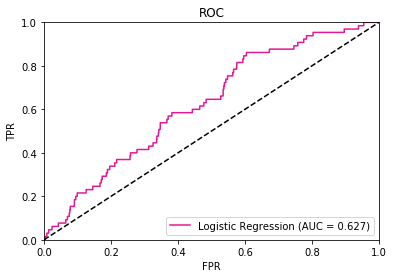

In [20]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,roc_auc_score
%matplotlib inline

train = pd.read_csv('data/cleaned_mostRecStat_train.csv',header=0,encoding='iso-8859-1')
train_y = train['is_placed']
train = train.drop("is_placed",1)


test = pd.read_csv('data/cleaned_mostRecStat_test.csv',header=0,encoding='iso-8859-1')
test_y = test['is_placed']
test = test.drop("is_placed",1)

logreg = LogisticRegression(C = 1)
logreg = logreg.fit(train, train_y)
pred = logreg.predict_proba(test)[:, 1]
rocplot(test_y, pred, "Logistic Regression")
train.columns

array(['in_process', 'is_rockstar', 'willingToRelocate', 'is_gmail',
       'is_aol', 'is_custom', 'is_male', 'func_11', 'func_13', 'func_15',
       'func_16', 'func_17', 'func_19', 'func_24', 'func_29', 'func_31',
       'func_33', 'func_38', 'func_41', 'func_49', 'func_5', 'func_59',
       'func_6', 'func_63', 'func_64', 'func_65', 'func_66', 'func_67',
       'func_7', 'tech_20', 'tech_22', 'tech_24', 'tech_3', 'tech_46',
       'tech_47', 'tech_48', 'tech_51', 'tech_53', 'tech_54', 'tech_9',
       'main_16', 'main_2', 'main_5', 'main_total'], dtype=object)

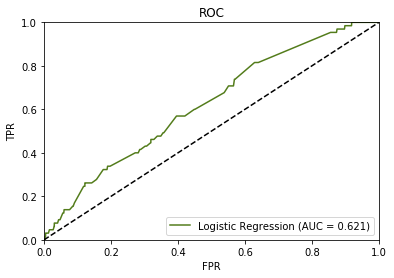

In [21]:
from sklearn.feature_selection import SelectFromModel
feature_sel = SelectFromModel(logreg, prefit = True)
train_new = feature_sel.transform(train)
test_new = feature_sel.transform(test)
new_logreg = LogisticRegression(C = 1)
new_logreg = new_logreg.fit(train_new, train_y)
new_pred = new_logreg.predict_proba(test_new)[:, 1]
rocplot(test_y, new_pred, "Logistic Regression")

features = train.columns.values
selected_features = features[feature_sel.get_support()]
selected_features

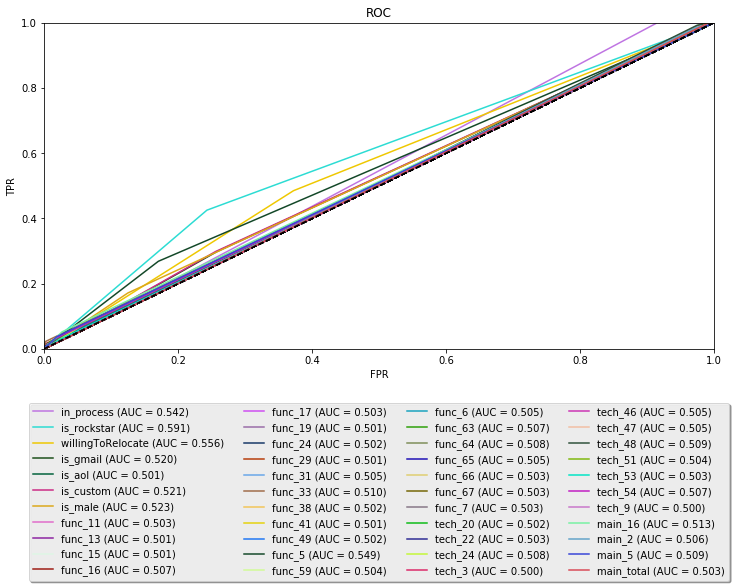

In [22]:
AUCs = []
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)
for feature in selected_features:
    auc = rocplot(train_y, train[feature], feature)
    AUCs.append((feature, auc))
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
lgd = ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True,
                shadow = True, ncol = 4, prop = {'size':10})

In [23]:
AUCs.sort(key=lambda tup: tup[1])
AUCs[-5:]

[('is_male', 0.52318754154069624),
 ('in_process', 0.54212265124922565),
 ('func_5', 0.54898180992621037),
 ('willingToRelocate', 0.55628912016420062),
 ('is_rockstar', 0.5911021497920268)]